<a href="https://colab.research.google.com/github/tirth1/ANN_playground/blob/main/ANN_implimentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf

In [102]:
tf.__version__

'2.6.0'

In [103]:
tf.keras.__version__

'2.6.0'

In [104]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [105]:
tf.config.list_physical_devices("TPU")

[]

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
mnist = tf.keras.datasets.mnist

In [5]:
(X_train_full, y_train_full),(X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [6]:
X_train_full.shape

(60000, 28, 28)

In [7]:
y_train_full.shape

(60000,)

In [8]:
X_test.shape

(10000, 28, 28)

In [9]:
X_train_full[0].shape

(28, 28)

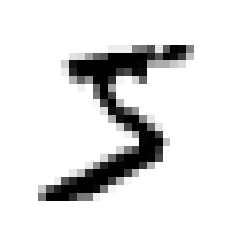

In [10]:
img = X_train_full[0]
plt.imshow(img, cmap="binary")
plt.axis("off")
plt.show()

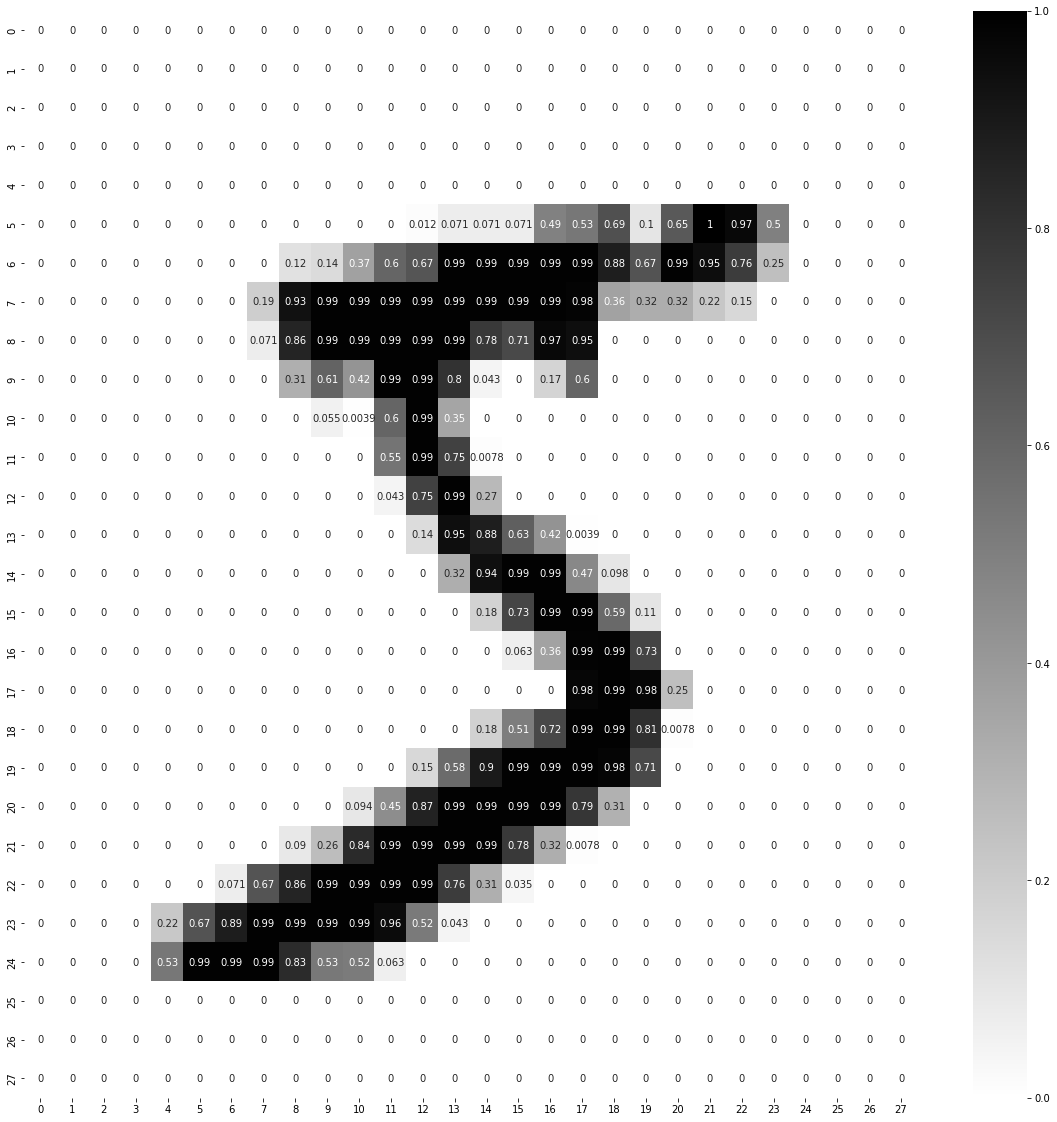

In [114]:
plt.figure(figsize=(20,20))
sns.heatmap(img/255, annot=True, cmap="binary")

In [11]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]


X_test = X_test / 255.

In [116]:
LAYERS = [
          tf.keras.layers.Flatten(input_shape=[28,28], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")
]

In [117]:
model_clf = tf.keras.models.Sequential(LAYERS)

In [118]:
model_clf.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputLayer (Flatten)         (None, 784)               0         
_________________________________________________________________
hiddenLayer1 (Dense)         (None, 300)               235500    
_________________________________________________________________
hiddenLayer2 (Dense)         (None, 100)               30100     
_________________________________________________________________
outputLayer (Dense)          (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [119]:
model_clf.layers[1].name

'hiddenLayer1'

In [120]:
weigths, biases = model_clf.layers[1].get_weights()

In [121]:
weigths.shape

(784, 300)

In [122]:
biases.shape

(300,)

In [123]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]


model_clf.compile(loss=LOSS_FUNCTION, optimizer=OPTIMIZER, metrics=METRICS)

In [125]:
EPOCHS = 30
VALIDATION = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, epochs=EPOCHS, validation_data=VALIDATION)

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3128 - accuracy: 0.9114 - val_loss: 0.2520 - val_accuracy: 0.9288
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2461 - accuracy: 0.9297 - val_loss: 0.2129 - val_accuracy: 0.9404
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2072 - accuracy: 0.9404 - val_loss: 0.1839 - val_accuracy: 0.9468
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1795 - accuracy: 0.9483 - val_loss: 0.1611 - val_accuracy: 0.9554
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1583 - accuracy: 0.9545 - val_loss: 0.1447 - val_accuracy: 0.9598
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1421 - accuracy: 0.9593 - val_loss: 0.1346 - val_accuracy: 0.9624
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1283 - accuracy: 0.9633 - val_loss: 0.1269 - val_accuracy:

In [126]:
history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [127]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.312807,0.911418,0.252017,0.9288
1,0.246079,0.929709,0.212885,0.9404
2,0.207214,0.940436,0.183917,0.9468
3,0.179545,0.948273,0.161127,0.9554
4,0.158294,0.954455,0.144707,0.9598
5,0.142129,0.959291,0.134642,0.9624
6,0.128264,0.963327,0.126931,0.9656
7,0.117144,0.966527,0.117442,0.9672
8,0.107560,0.969855,0.111692,0.9694
9,0.099166,0.972164,0.103658,0.9714


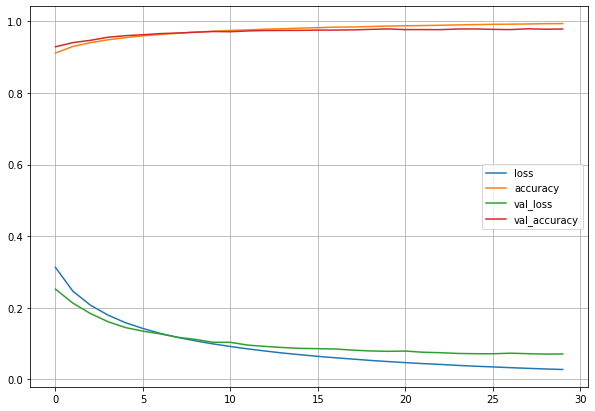

In [128]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.grid()
plt.show()

In [129]:
model_clf.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0704 - accuracy: 0.9783


[0.07035625725984573, 0.9782999753952026]

In [130]:
X_test_new = X_test[:3]
y_test_new = y_test[:3]

y_prob = model_clf.predict(X_new)
y_prob.round(2)

array([[0.06, 0.11, 0.11, 0.03, 0.11, 0.2 , 0.11, 0.06, 0.12, 0.09],
       [0.06, 0.11, 0.11, 0.03, 0.11, 0.2 , 0.11, 0.06, 0.12, 0.09],
       [0.06, 0.11, 0.11, 0.03, 0.11, 0.2 , 0.11, 0.06, 0.12, 0.09]],
      dtype=float32)

In [131]:
y_pred = np.argmax(y_prob, axis=-1)
y_pred

array([5, 5, 5])

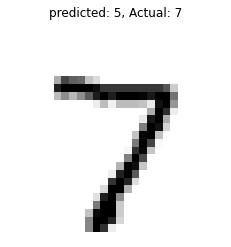

------------------------------------------------------------


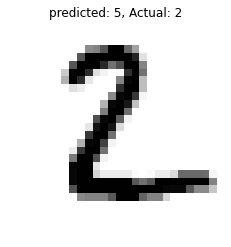

------------------------------------------------------------


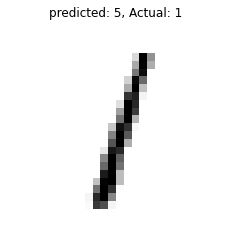

------------------------------------------------------------


In [132]:
for img, pred, actual in zip(X_test_new, y_pred, y_test_new):
  plt.imshow(img, cmap="binary")
  plt.title(f"predicted: {pred}, Actual: {actual}")
  plt.axis("off")
  plt.show()
  print("---"*20)